In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# There are No missing value in the Dataset

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
print("Categories of 'gender' varialble:   ",end="")
print(df['gender'].unique())

print("Categories of 'race/ethnicity' varialble:   ",end="")
print(df['race/ethnicity'].unique())

print("Categories of 'parental level of education' varialble:   ",end="")
print(df['parental level of education'].unique())

print("Categories of 'lunch ' varialble:   ",end="")
print(df['lunch'].unique())

print("Categories of 'test preparation course' varialble:   ",end="")
print(df['test preparation course'].unique())


Categories of 'gender' varialble:   ['female' 'male']
Categories of 'race/ethnicity' varialble:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories of 'parental level of education' varialble:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories of 'lunch ' varialble:   ['standard' 'free/reduced']
Categories of 'test preparation course' varialble:   ['none' 'completed']


In [14]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical features : {}'.format(len(numerical_feature), numerical_feature))
print('We have {} categorical features : {}'.format(len(categorical_feature), categorical_feature))


We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']



# Adding Columns for "Total Score" and "Average"

In [15]:
df['Total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average_score'] = df['Total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading score'] == 100]['Average_score'].count()
writing_full = df[df['writing score'] == 100]['Average_score'].count()
math_full = df[df['math score'] == 100]['Average_score'].count()

print("Number of students with full marks in each subject:")
print("Reading:", reading_full)
print("Writing:", writing_full)
print("Math:", math_full)   


Number of students with full marks in each subject:
Reading: 17
Writing: 14
Math: 7


In [17]:
reading_less_20 = df[df['reading score'] <= 20]['Average_score'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average_score'].count()
math_less_20 = df[df['math score'] <= 20]['Average_score'].count()

print("Number of students with less than or equal to 20 marks in each subject:")
print("Reading:", reading_less_20)
print("Writing:", writing_less_20)
print("Math:", math_less_20)

Number of students with less than or equal to 20 marks in each subject:
Reading: 1
Writing: 3
Math: 4


# Data Visualization

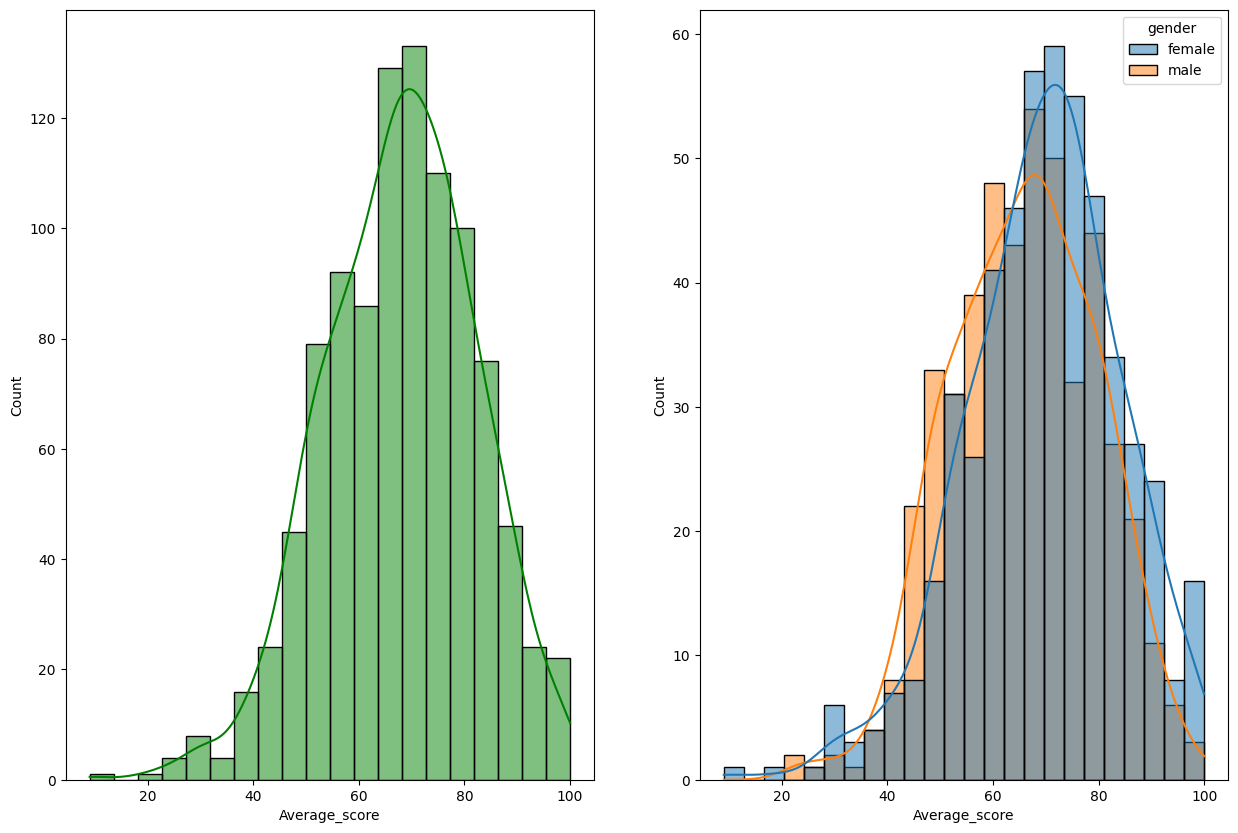

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig , axs = plt.subplots(1, 2, figsize=(15, 10))
plt.subplot(121)
sns.histplot(data=df, x='Average_score', bins=20, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='Average_score', kde=True, hue='gender')
plt.show()

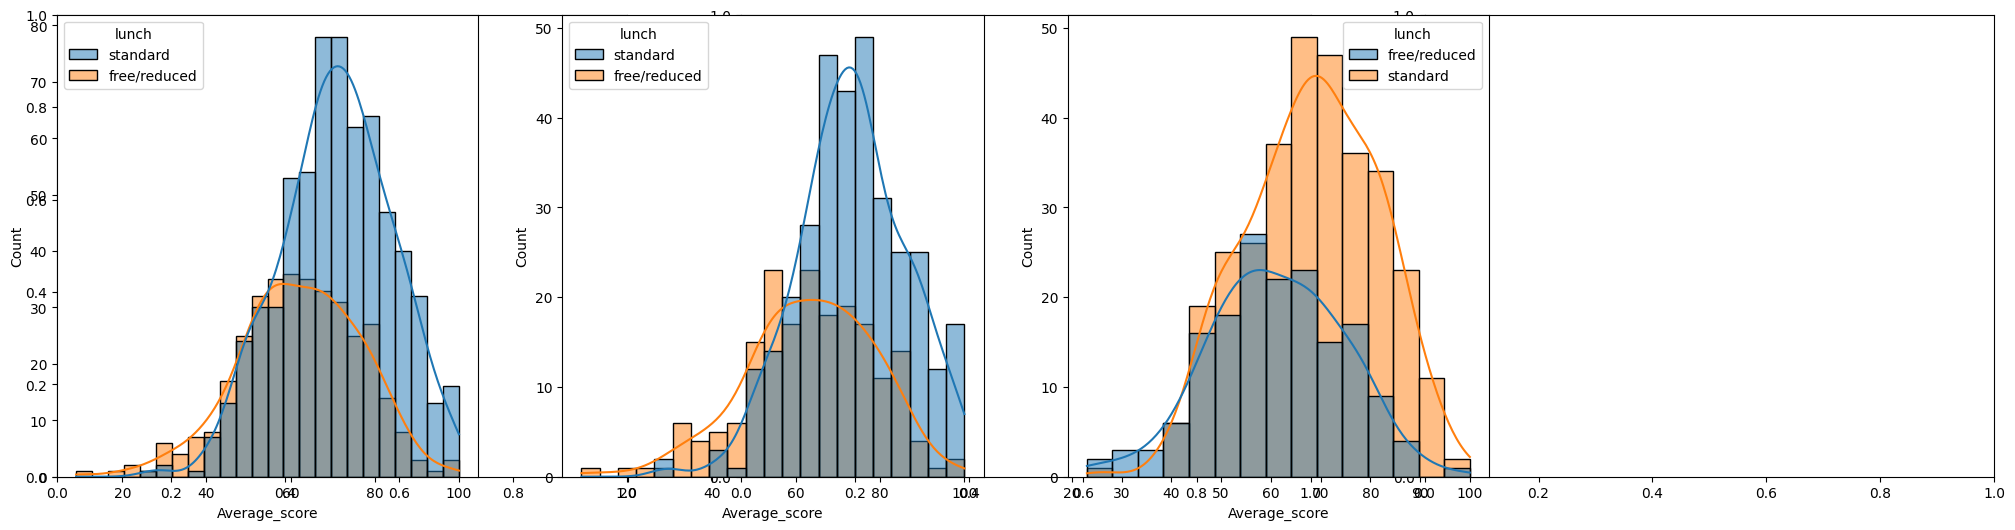

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='lunch')
plt.show()

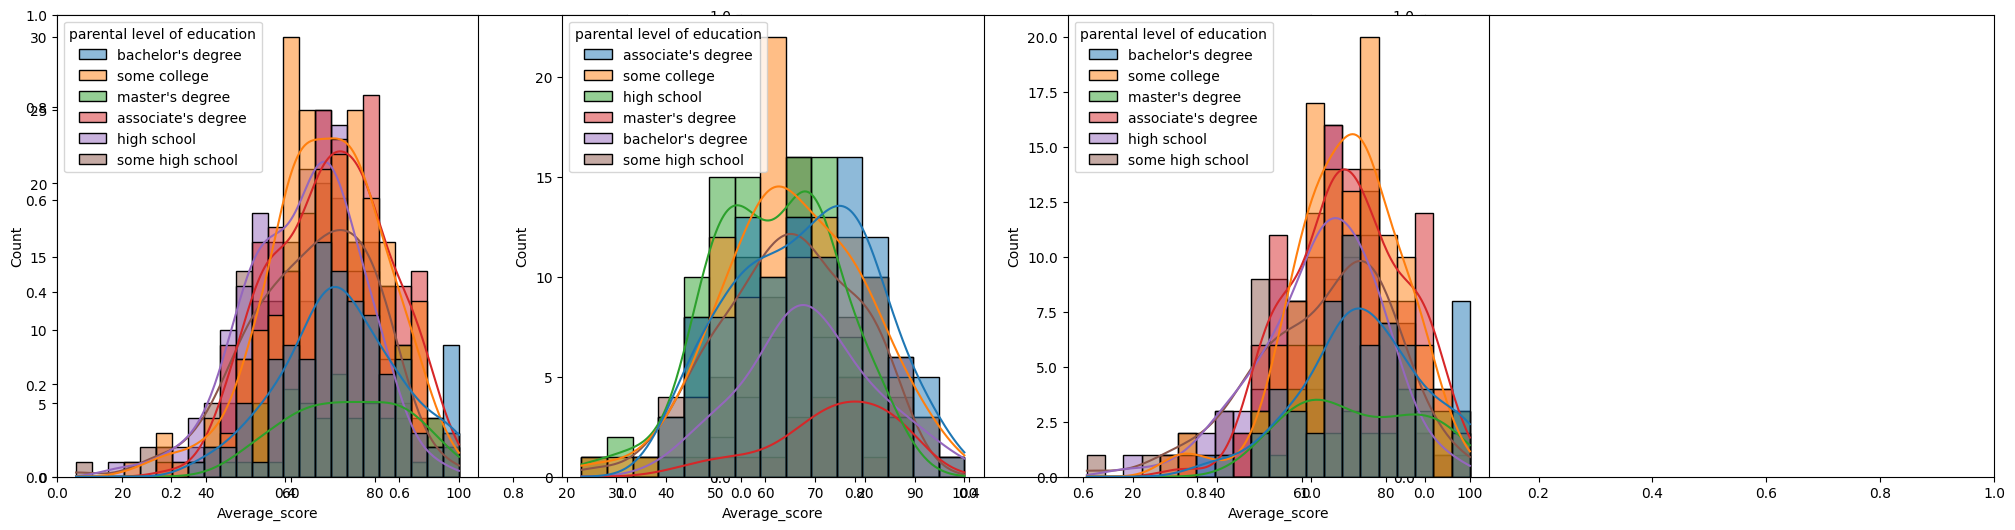

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='parental level of education')
plt.show()

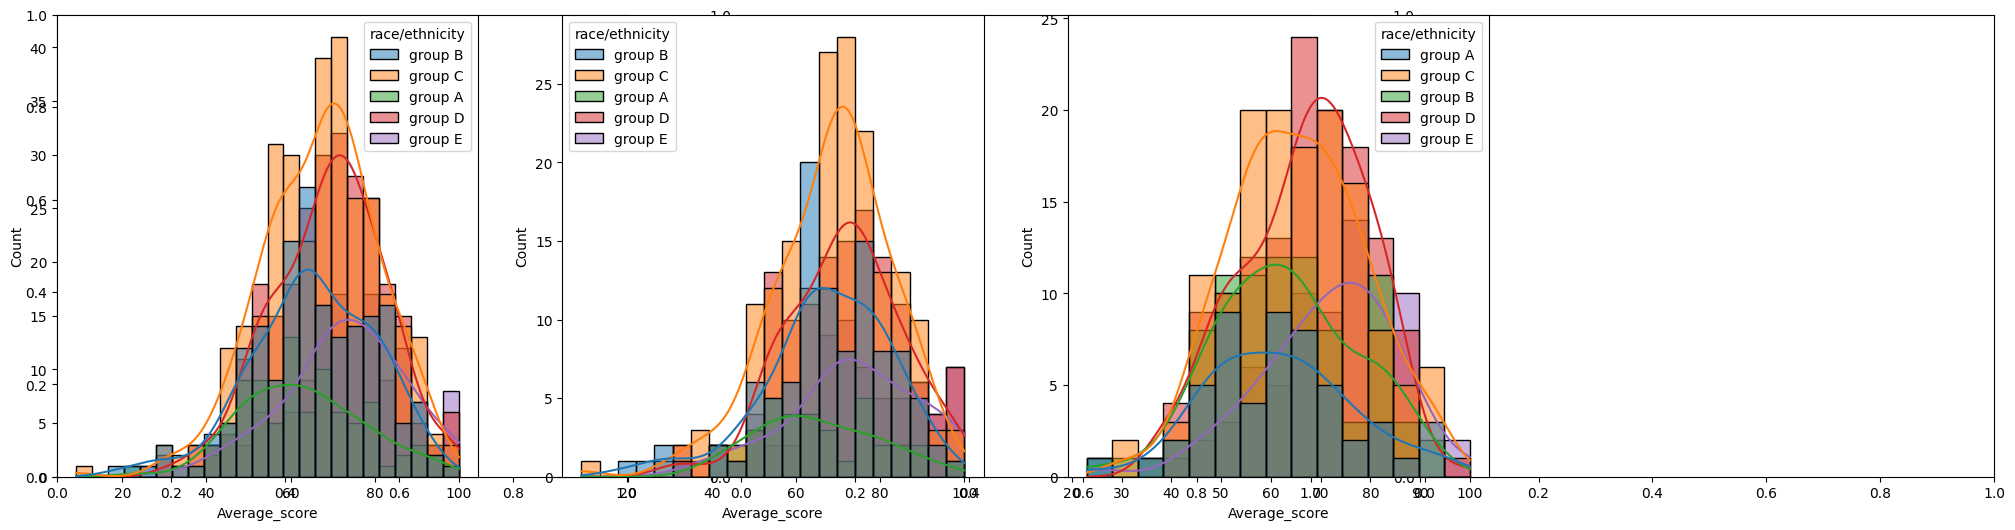

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',kde=True,hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='race/ethnicity')
plt.show()

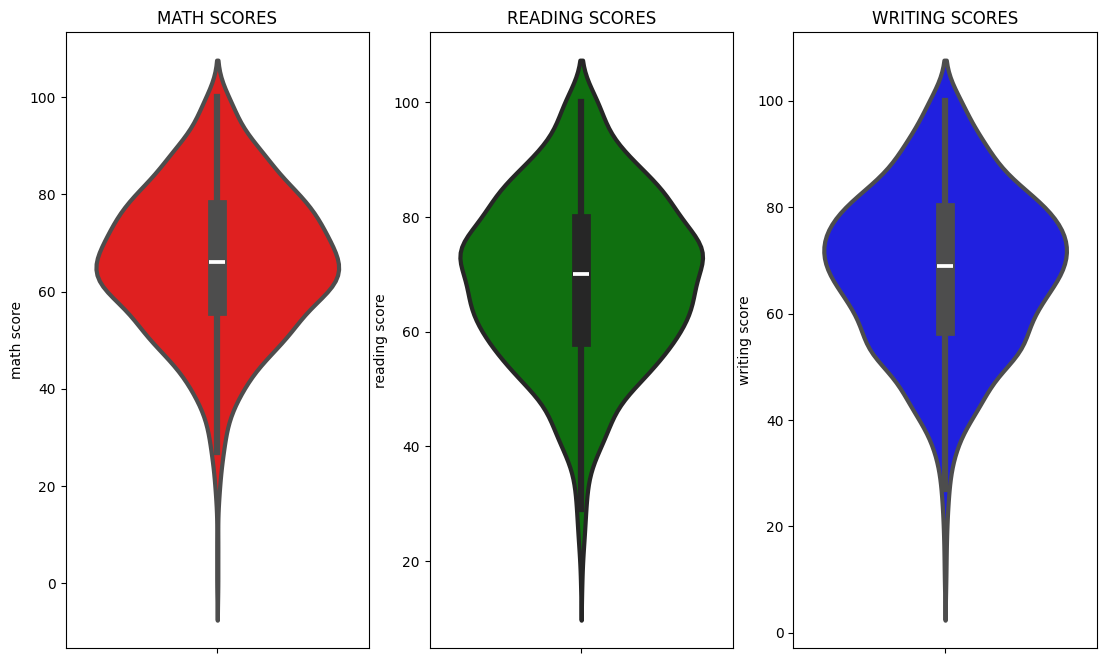

In [25]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

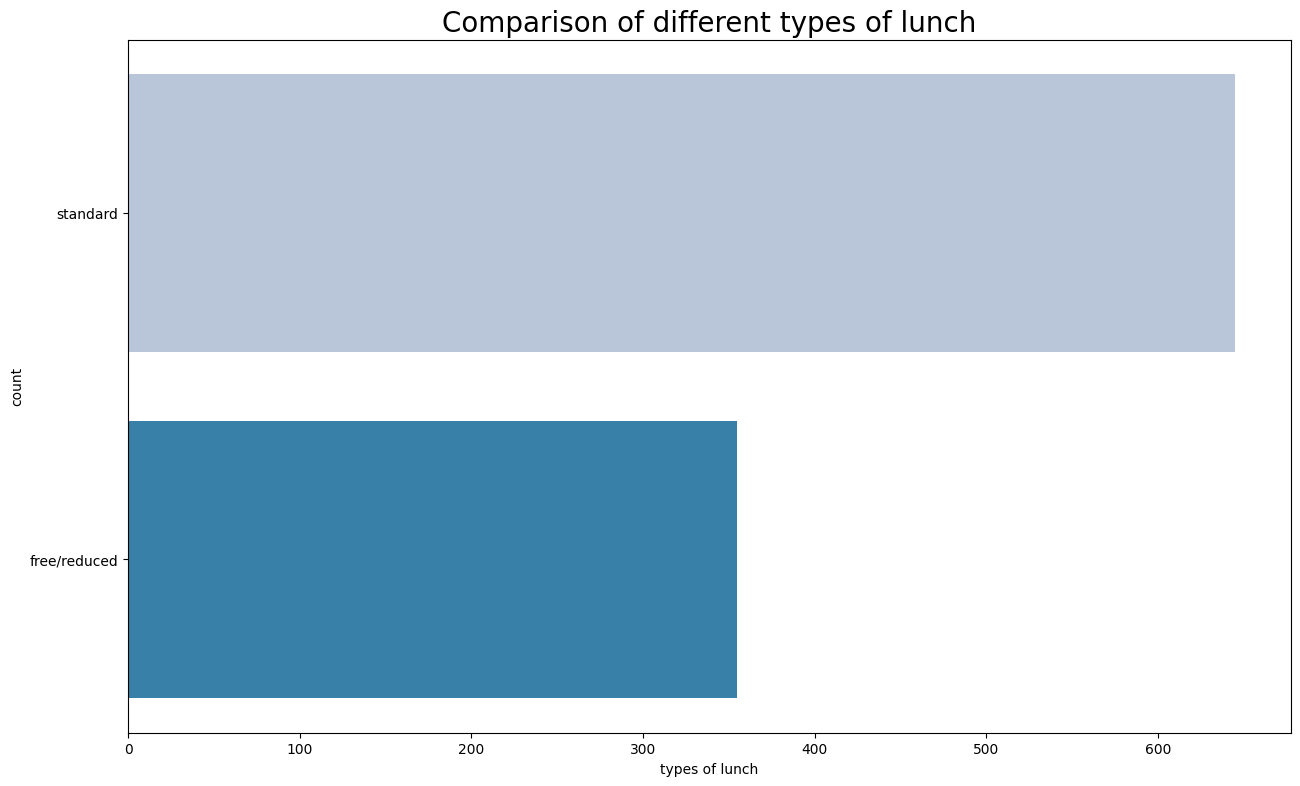

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)  
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

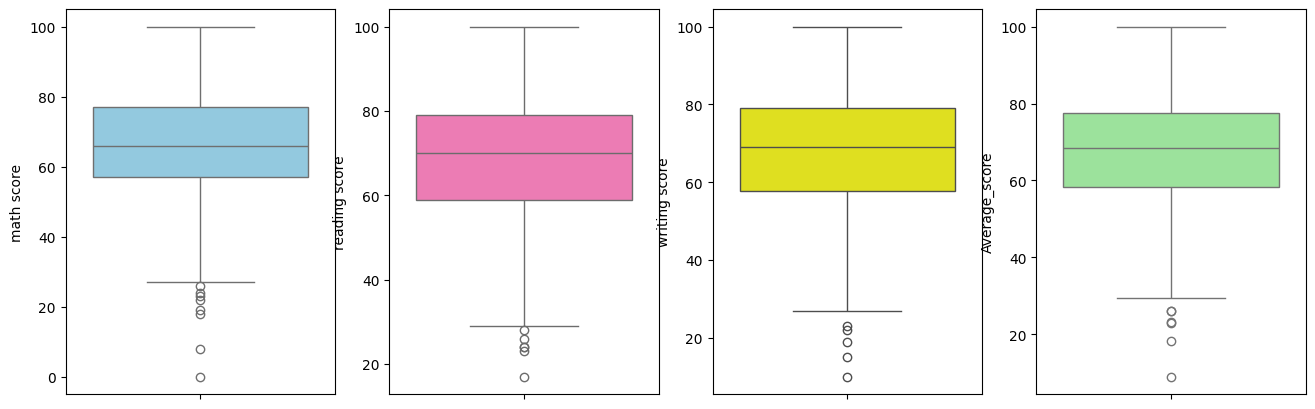

In [30]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average_score'],color='lightgreen')
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.